<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1">Dataset</a></span><ul class="toc-item"><li><span><a href="#MNIST-load-&amp;-0,-6-dataset" data-toc-modified-id="MNIST-load-&amp;-0,-6-dataset-1.1">MNIST load &amp; 0, 6 dataset</a></span></li></ul></li><li><span><a href="#CNN" data-toc-modified-id="CNN-2">CNN</a></span><ul class="toc-item"><li><span><a href="#Parameter" data-toc-modified-id="Parameter-2.1">Parameter</a></span></li><li><span><a href="#Define-network" data-toc-modified-id="Define-network-2.2">Define network</a></span></li></ul></li><li><span><a href="#Training-&amp;-Testing" data-toc-modified-id="Training-&amp;-Testing-3">Training &amp; Testing</a></span></li><li><span><a href="#Video-Testing" data-toc-modified-id="Video-Testing-4">Video Testing</a></span><ul class="toc-item"><li><span><a href="#Video-frame-extraction" data-toc-modified-id="Video-frame-extraction-4.1">Video frame extraction</a></span></li><li><span><a href="#Test-&amp;-Accuarcy" data-toc-modified-id="Test-&amp;-Accuarcy-4.2">Test &amp; Accuarcy</a></span></li></ul></li><li><span><a href="#Extract-the-video-clips-with-lesions" data-toc-modified-id="Extract-the-video-clips-with-lesions-5">Extract the video clips with lesions</a></span><ul class="toc-item"><li><span><a href="#Clip-Pieces" data-toc-modified-id="Clip-Pieces-5.1">Clip Pieces</a></span></li><li><span><a href="#How-to-extract-the-video-clips" data-toc-modified-id="How-to-extract-the-video-clips-5.2">How to extract the video clips</a></span><ul class="toc-item"><li><span><a href="#1.-Clustering" data-toc-modified-id="1.-Clustering-5.2.1">1. Clustering</a></span></li><li><span><a href="#2.-#-of-lesions" data-toc-modified-id="2.-#-of-lesions-5.2.2">2. # of lesions</a></span></li><li><span><a href="#3.-fixed-clip-length-from-the-lesion-which-is-discovered-first" data-toc-modified-id="3.-fixed-clip-length-from-the-lesion-which-is-discovered-first-5.2.3">3. fixed clip length from the lesion which is discovered first</a></span></li></ul></li><li><span><a href="#Clip-Interval" data-toc-modified-id="Clip-Interval-5.3">Clip Interval</a></span></li><li><span><a href="#Making-the-Video-Clips" data-toc-modified-id="Making-the-Video-Clips-5.4">Making the Video Clips</a></span></li></ul></li></ul></div>

# Dataset

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## MNIST load & 0, 6 dataset 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 0, 6 추출 

train_idx0 = np.argmax(mnist.train.labels, 1) == 0
test_idx0 = np.argmax(mnist.test.labels, 1) == 0
train_img0   = mnist.train.images[train_idx0]
test_img0    = mnist.test.images[test_idx0]

train_idx6 = np.argmax(mnist.train.labels, 1) == 6
test_idx6 = np.argmax(mnist.test.labels, 1) == 6
train_img6   = mnist.train.images[train_idx6]
test_img6    = mnist.test.images[test_idx6]


# label -> binary
train_label0 = np.hstack([np.ones([train_img0.shape[0], 1]), np.zeros([train_img0.shape[0], 1])])
test_label0 = np.hstack([np.ones([test_img0.shape[0], 1]), np.zeros([test_img0.shape[0], 1])])
train_label6 = np.hstack([np.zeros([train_img6.shape[0], 1]), np.ones([train_img6.shape[0], 1])])
test_label6 = np.hstack([np.zeros([test_img6.shape[0], 1]), np.ones([test_img6.shape[0], 1])])


# train_set

train_img = np.vstack([train_img0, train_img6])
train_label = np.vstack([train_label0, train_label6])
test_img = np.vstack([test_img0, test_img6])
test_label = np.vstack([test_label0, test_label6])

print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

(10861, 784)
(10861, 2)
(1938, 784)
(1938, 2)


In [4]:
def batchmaker_binary(parameter, n_batch):
    
    if parameter == 'train': 
        
        train_idx = np.random.choice(len(train_img), n_batch, replace = False)
        
        train_img_set = []
        train_label_set = []
        
        for i in train_idx:
            train_img_set.append(train_img[i])
            train_label_set.append(train_label[i])
        
        train_img_set = np.array(train_img_set)
        train_label_set = np.array(train_label_set)
        
        return train_img_set, train_label_set
            
    
    elif parameter == 'test':

        test_idx = np.random.choice(len(test_img), n_batch, replace = False)
        
        test_img_set = []
        test_label_set = []
        
        for i in test_idx:
            test_img_set.append(test_img[i])
            test_label_set.append(test_label[i])
        
        test_img_set = np.array(test_img_set)
        test_label_set = np.array(test_label_set)
        
        return test_img_set, test_label_set

# CNN 

## Parameter

In [5]:
input_h = 28 # Input height
input_w = 28 # Input width
input_ch = 1 # Input channel : Gray scale
# (None, 28, 28, 1)

## First convolution layer
# Filter size
k1_h = 3
k1_w = 3
# the number of channels
k1_ch = 32
# Pooling size
p1_h = 2
p1_w = 2
# (None, 14, 14 ,32)

## Second convolution layer
# Filter size
k2_h = 3
k2_w = 3
# the number of channels
k2_ch = 64
# Pooling size
p2_h = 2
p2_w = 2
# (None, 7, 7 ,64)

## Fully connected
# Flatten the features
# -> (None, 7*7*64)
conv_result_size = int((28/(2*2)) * (28/(2*2)) * k2_ch)
n_hidden1 = 100
n_output = 2

In [6]:
weights = {
    #conv1 filter 3x3, channel x channel 1x32
    #conv2 3x3, 32x64
    #hidden1 7x7x64, 100
    #output 100, 10
    'conv1' : tf.Variable(tf.random_normal([k1_h, k1_w, input_ch, k1_ch],stddev = 0.1), name = 'w1'),
    'conv2' : tf.Variable(tf.random_normal([k2_h, k2_w, k1_ch, k2_ch],stddev = 0.1), name ='w2'),
    'hidden1' : tf.Variable(tf.random_normal([conv_result_size, n_hidden1], stddev = 0.1), name = 'w_h1'),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1), name='w_output')
}

biases = {
    'conv1' : tf.Variable(tf.random_normal([k1_ch], stddev = 0.1), name = 'b1'),
    'conv2' : tf.Variable(tf.random_normal([k2_ch], stddev = 0.1), name = 'b2'),
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1), name = 'b_h1'),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1), name = 'b_output')
}

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch], name = 'input_img')
y = tf.placeholder(tf.float32, [None, n_output], name = 'input_label')

Instructions for updating:
Colocations handled automatically by placer.


## Define network

In [7]:
# Define Network
def net(x, weights, biases):
    ## First convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, 
                           ksize = [1, p1_h, p1_w, 1], 
                           strides = [1, p1_h, p1_w, 1], 
                           padding = 'VALID'
                           )
    
    ## Second convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, 
                           ksize = [1, p2_h, p2_w, 1], 
                           strides = [1, p2_h, p2_w, 1], 
                           padding = 'VALID')

    # shape = conv2.get_shape().as_list()
    # maxp2_re = tf.reshape(conv2, [-1, shape[1]*shape[2]*shape[3]])
    maxp2_re = tf.reshape(maxp2, [-1, conv_result_size])
    
    ### Fully connected
    hidden1 = tf.add(tf.matmul(maxp2_re, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'], name = 'output')
    return output

In [8]:
LR = 0.0001

pred = net(x, weights, biases)
# loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

# Training & Testing

In [9]:
n_batch = 50
n_iter = 10000
n_prt = 250

In [10]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

saver = tf.train.Saver()
# Training cycle
for epoch in range(n_iter):
    train_x, train_y = batchmaker_binary('train', n_batch)
    train_x = np.reshape(train_x, [-1, input_h, input_w, input_ch]) # !   
    sess.run(optm, feed_dict={x: train_x,  y: train_y})
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: train_x, y: train_y})
        my_pred = sess.run(pred, feed_dict={x : train_x.reshape(-1, 28, 28, 1)})
        my_pred = np.argmax(my_pred, axis=1)
        labels = np.argmax(train_y, axis=1)
        accr = np.mean(np.equal(my_pred, labels))
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))
        print ("Accr : {}%".format(accr*100))
        
saver.save(sess, './model/Binary0_6_MNIST_c1mp1-x2_fc1')

Iter : 0
Cost : 0.6749286651611328
Accr : 54.0%
Iter : 250
Cost : 0.028347298502922058
Accr : 100.0%
Iter : 500
Cost : 0.004377404227852821
Accr : 100.0%
Iter : 750
Cost : 0.007963689975440502
Accr : 100.0%
Iter : 1000
Cost : 0.0008429809822700918
Accr : 100.0%
Iter : 1250
Cost : 0.0030161100439727306
Accr : 100.0%
Iter : 1500
Cost : 0.002442198572680354
Accr : 100.0%
Iter : 1750
Cost : 0.002863631583750248
Accr : 100.0%
Iter : 2000
Cost : 0.007754945661872625
Accr : 100.0%
Iter : 2250
Cost : 9.079654410015792e-05
Accr : 100.0%
Iter : 2500
Cost : 0.00016416155267506838
Accr : 100.0%
Iter : 2750
Cost : 0.00029451484442688525
Accr : 100.0%
Iter : 3000
Cost : 0.0021484270691871643
Accr : 100.0%
Iter : 3250
Cost : 0.000506136508192867
Accr : 100.0%
Iter : 3500
Cost : 0.0030328494030982256
Accr : 100.0%
Iter : 3750
Cost : 0.00018755593919195235
Accr : 100.0%
Iter : 4000
Cost : 0.0008873664774000645
Accr : 100.0%
Iter : 4250
Cost : 0.00019559310749173164
Accr : 100.0%
Iter : 4500
Cost : 0.00

'./model/Binary0_6_MNIST_c1mp1-x2_fc1'

In [ ]:
test_x, test_y = batchmaker_binary('test', 100)
test_x = np.reshape(test_x, [-1, input_h, input_w, input_ch]) # !   

INFO:tensorflow:Restoring parameters from ./model/Binary0_6_MNIST_c1mp1-x2_fc1
Accuracy: 99.7 +/- 0.47958315233127197 %



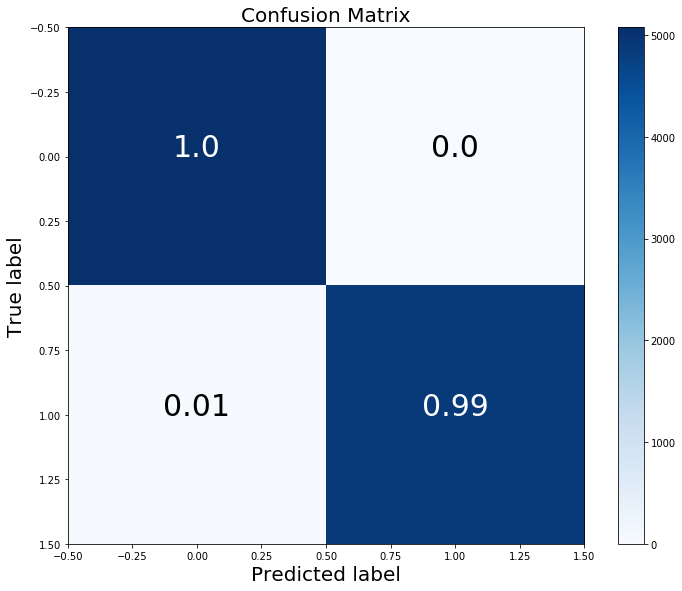

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

model_path = './model/Binary0_6_MNIST_c1mp1-x2_fc1'
test_graph = tf.Graph()

with tf.Session(graph = test_graph) as sess:
    
    loader = tf.train.import_meta_graph(model_path +'.meta')
    loader.restore(sess, model_path)
    
    x_load = test_graph.get_tensor_by_name('input_img:0')
    y_load = test_graph.get_tensor_by_name('input_label:0')
    
    output_load = test_graph.get_tensor_by_name('output:0')
    
    accr_test = []
    list_labels = []
    list_preds = []
    
    for _ in range(100):
        test_x, test_y = batchmaker_binary('test', 100)
        test_x = np.reshape(test_x, [-1, input_h, input_w, input_ch]) 
        temp_pred = sess.run(output_load, feed_dict = {'input_img:0': test_x})

        temp_p = np.argmax(temp_pred, axis = 1)
        temp_l = np.argmax(test_y, axis = 1)
        temp_a = np.mean(np.equal(temp_p, temp_l))

        accr_test.append(temp_a*100)
        list_labels.append(temp_l)
        list_preds.append(temp_p)
        
labels = np.squeeze(np.reshape(list_labels, (1, -1)))
preds = np.squeeze(np.reshape(list_preds, (1, -1)))
    
print('Accuracy: {0} +/- {1} %\n'.format(np.mean(accr_test), np.std(accr_test)))

cm = confusion_matrix(labels, preds)
    
plt.figure(figsize = (10,8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix', fontsize = 20)
plt.colorbar()
thresh = cm.max()/1.5

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j]/(np.sum(cm, 1)[i]), 2),
                 fontsize = 30,
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 20)
plt.show()

# Video Testing

## Video frame extraction

In [16]:
# Test video sample

import cv2

frame_set = []
label_set = []
frame_rate = 5

path = './files/video/mnist0_with6.avi'
video = cv2.VideoCapture(path)

while(video.isOpened()):

    ret, frame = video.read() 

    if ret:
        current_frame = int(video.get(1))
        cv2.imwrite('./files/frame_clip/frame_{0:04d}.jpg'.format(current_frame), frame, params=[cv2.IMWRITE_JPEG_QUALITY,100])
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_set.append(frame)
    else:
        break

print("Total frame of video = {}".format(video.get(7)))
video.release()
        
frame_set = np.asarray(frame_set)
frame_set = frame_set.reshape(-1, 28, 28, 1)  # CNN input channel 만들어줌

Total frame of video = 1000.0


In [17]:
import pandas as pd

clip_class = pd.read_csv('./files/clip_class.csv', index_col = 0)     # reading the csv file
clip_class.head()      # printing first five rows of the file

,Image_ID,Class
0,frame_0001.jpg,0
1,frame_0002.jpg,0
2,frame_0003.jpg,0
3,frame_0004.jpg,0
4,frame_0005.jpg,0


In [18]:
from keras.utils import np_utils

actual = clip_class.Class
actual_class = np_utils.to_categorical(actual)
print(actual_class)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Using TensorFlow backend.


## Test & Accuarcy

In [31]:
model_path = './model/Binary0_6_MNIST_c1mp1-x2_fc1'
test_graph = tf.Graph()

with tf.Session(graph = test_graph) as sess:
    
    loader = tf.train.import_meta_graph(model_path +'.meta')
    loader.restore(sess, model_path)
    
    x_load = test_graph.get_tensor_by_name('input_img:0')
    y_load = test_graph.get_tensor_by_name('input_label:0')
    
    output_load = test_graph.get_tensor_by_name('output:0')

    logits_v = sess.run(tf.nn.softmax(output_load), feed_dict = {'input_img:0': frame_set})

    pred_v = np.argmax(logits_v, axis = 1)
    actual_v = np.argmax(actual_class, axis = 1)
    accr = np.mean(np.equal(pred_v, actual_v))
    
    print('Accuracy: {} %\n'.format(accr*100))

INFO:tensorflow:Restoring parameters from ./model/Binary0_6_MNIST_c1mp1-x2_fc1
Accuracy: 100.0 %



In [ ]:
with tf.Session() as sess:

    logits_v = sess.run(tf.nn.softmax(pred), feed_dict={x : frame_set})
    pred_v = np.argmax(logits_v, axis=1)
    actual_v = np.argmax(actual_class, axis=1)
    accr = np.mean(np.equal(pred_v, actual_v))

    print("Accuacy = {}%".format(accr*100))

# Extract the video clips with lesions

## Clip Pieces

In [28]:
print(actual_class)
print(actual_class.shape)
print(actual_class[0, 1])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(1000, 2)
0.0


In [29]:
actual_class.shape[0]

1000

In [130]:
clip_true = []
n = 0

for i in range(actual_class.shape[0]):
    if np.argmax(actual_class[i]) != 0:
        clip_true.append(i)
        
clip_true = np.array(clip_true)

print(clip_true)
print(clip_true.shape)

[ 32  33  37  39  49 285 287 293 297 386 388 400 477 478 481 491 502 504
 505 513 514 589 591 596 624 625 626 629 631 761 764 766 780 798 799 801
 802 804 805 812 813 815]
(42,)


In [33]:
type(logits_v)

numpy.ndarray

In [34]:
clip_piece = []
n = 0

for i in range(logits_v.shape[0]):
    if logits_v[i, 1] >= 0.9:
        clip_piece.append(i)
        
clip_piece = np.array(clip_piece)

print(clip_piece)
print(clip_piece.shape)

[ 32  33  37  39  49 285 287 293 297 386 388 400 477 478 481 491 502 504
 505 513 514 589 591 596 624 625 626 629 631 761 764 766 780 798 799 801
 802 804 805 812 813 815]
(42,)


## How to extract the video clips

### 1. Clustering

In [87]:
m = clip_piece.shape[0]

mu = clip_piece[np.random.randint(0, m, 4)]
print(mu)
mu.sort()
print(mu)
print(type(mu))

print(mu[0])

[293 798 626 596]
[293 596 626 798]
<class 'numpy.ndarray'>
293


In [ ]:
mu = clip_piece[np.random.randint(0, m, k)]

In [85]:
y = np.array([0, 1, 0, 1, 0, 0, 0]).reshape(-1, 1)

aaa = clip_piece[np.where(y == 0)[0]]

sss = int(np.mean(aaa))

print(sss)

Aad = len(aaa)

for l in range(Aad):
    print(aaa[l])

138
32
37
49
285
287


In [62]:
K = [i+1 for i in range(20)]

print(K)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [101]:
mu = np.random.choice(m, 5, replace=False)
print(mu)
mu.sort()
print(mu)

[ 9  3 32 38 14]
[ 3  9 14 32 38]


In [124]:
K = [i+1 for i in range(20)] #[1, 2, 3, .., 20]
m = clip_piece.shape[0]  # 42
score_set = []

for k in K:    
    # mu = clip_piece[np.random.randint(0, m, k)]
    mu = clip_piece[np.random.choice(m, k, replace=False)]
    mu.sort()
    print(mu)
    pre_mu = mu.copy()
    y = np.empty([m, 1])
    
    for n_iter in range(500):
        d = np.empty([m, k])
        
        for i in range(m):
            for j in range(k):
                d[i][j] = np.abs(clip_piece[i] - mu[j])
                y[i] = np.argmin([d[i]])

        err = 0
        print(y.reshape(1,-1))
        for h in range(k):
            mu[h] = int(np.mean(clip_piece[np.where(y == h)[0]]))
            #print("mu[{}]".format(h), mu[h])
            err += np.abs(pre_mu[h] - mu[h])

        pre_mu = mu.copy()
       

        if err < 1e-10:
            print("Iteration ", n_iter+1)
            print("err ", err)
           
            score_total = 0
            for p in range(k):
                clip_k = clip_piece[np.where(y == p)[0]]
                clip_len = len(clip_k)                  
                for l in range(clip_len):
                    score = np.abs(mu[p] - clip_k[l])
                    score_total += score
            score_set.append(score_total)
            print('k = {}, score = {}\n'.format(p+1, score_total))
          
            break

[32]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Iteration  2
err  0
k = 1, score = 8240

[631 802]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Iteration  4
err  0
k = 2, score = 5075

[ 33 798 801]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 

  16. 17. 17. 18. 18. 19.]]
Iteration  4
err  0
k = 20, score = 67



In [118]:
print(score_set)

[8240, 5075, 2715, 2571, 1832, 520, 656, 639, 255, 562, 267, 231, 189, 113, 114, 107, 105, 72]


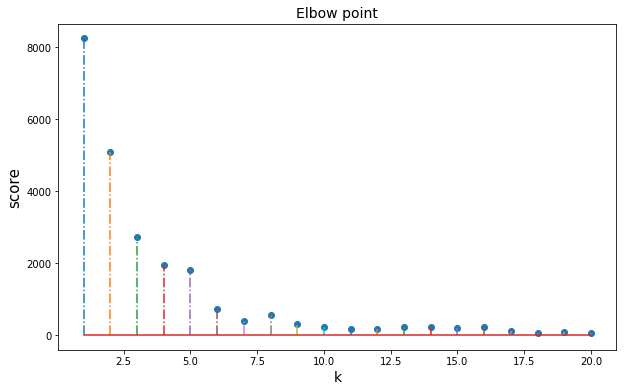

In [125]:
plt.figure(figsize=(10, 6))
plt.title("Elbow point", fontsize=14)
plt.stem(np.arange(1,len(score_set)+1,1), score_set, '-.')
plt.xlabel("k", fontsize=14)
plt.ylabel("score", fontsize=15)
plt.show()

Iteration  2
err  0
k = 1, score = 8240



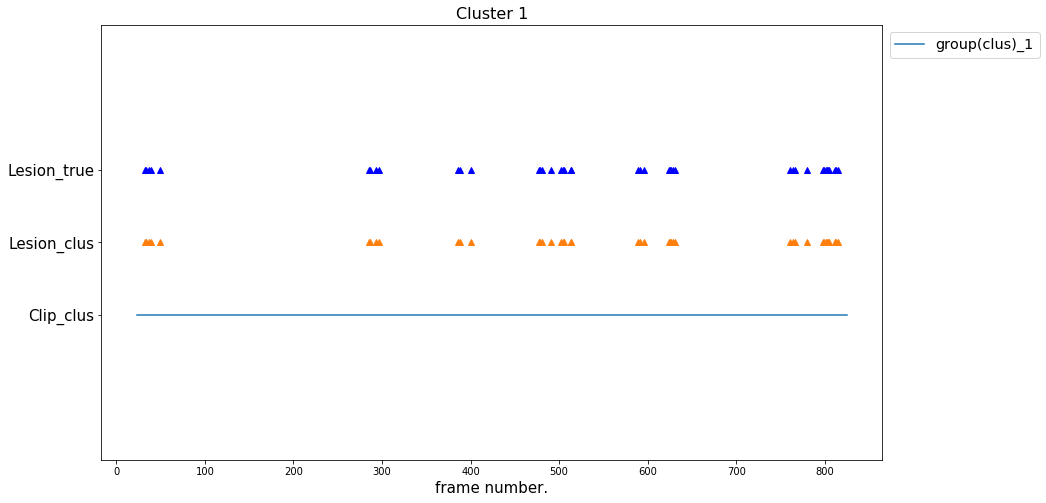

Iteration  4
err  0
k = 2, score = 5075



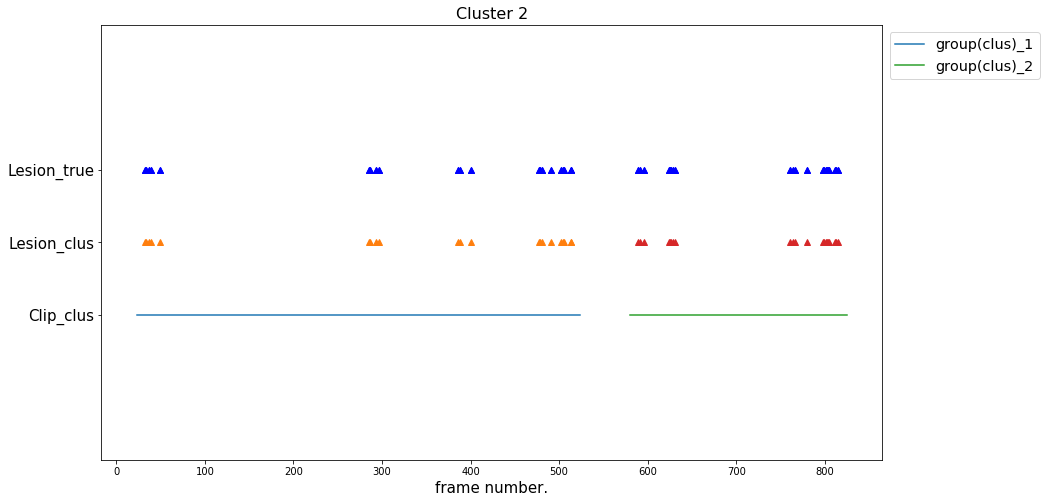

Iteration  3
err  0
k = 3, score = 2715



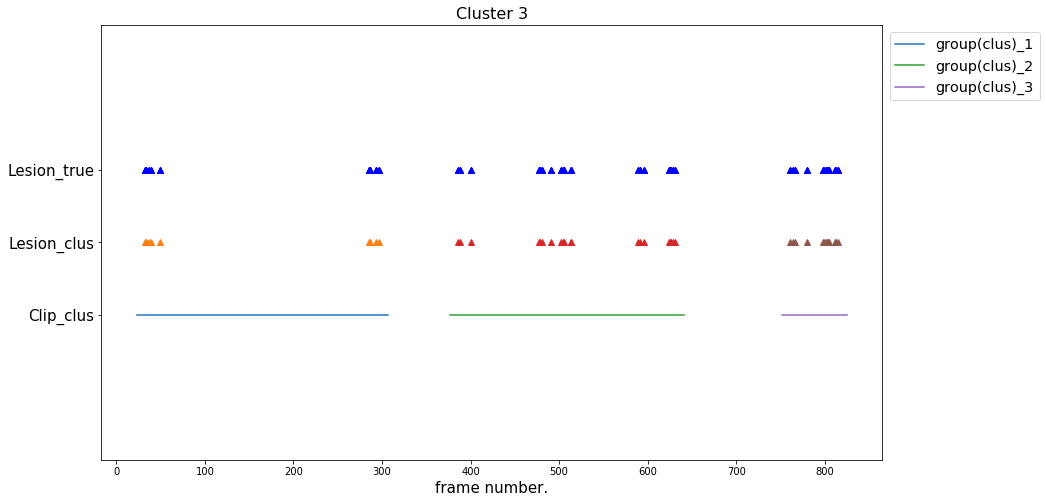

Iteration  3
err  0
k = 4, score = 1579



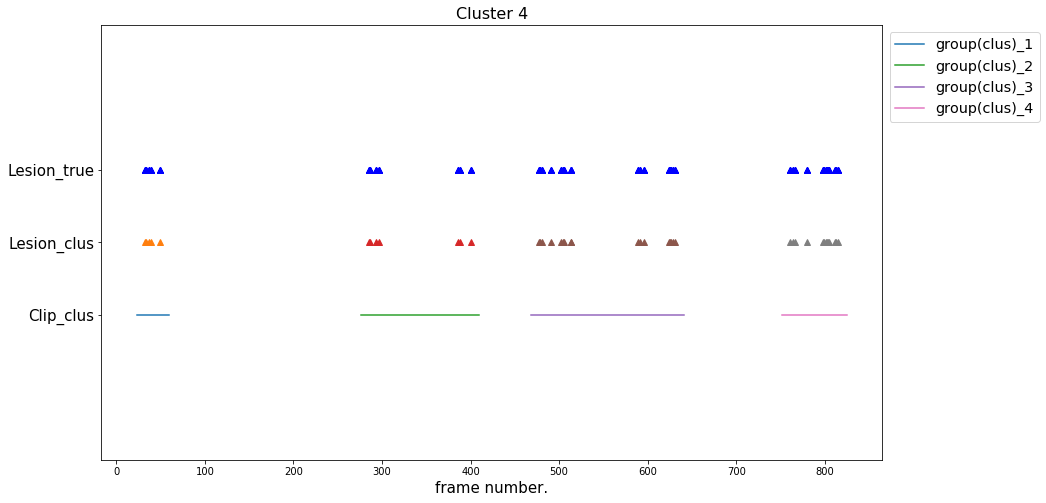

Iteration  4
err  0
k = 5, score = 830



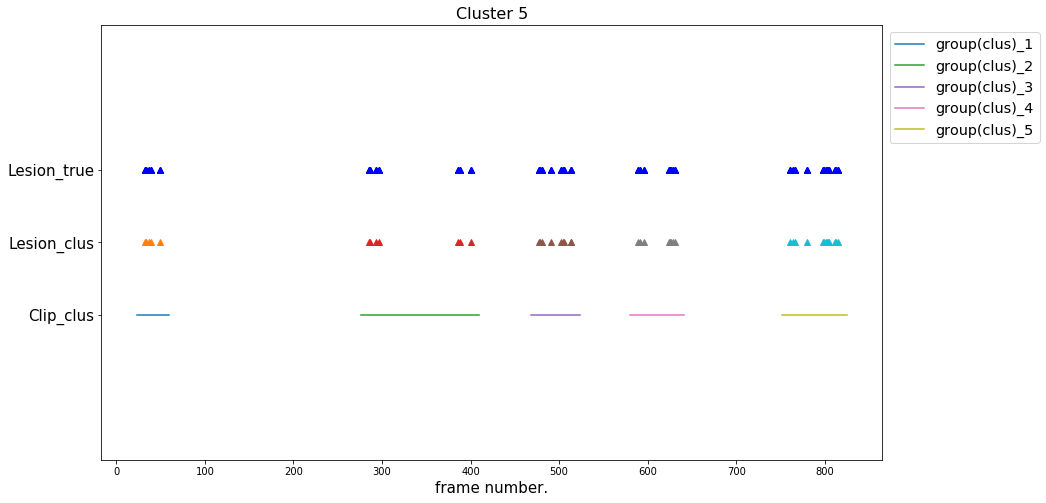

Iteration  6
err  0
k = 6, score = 717



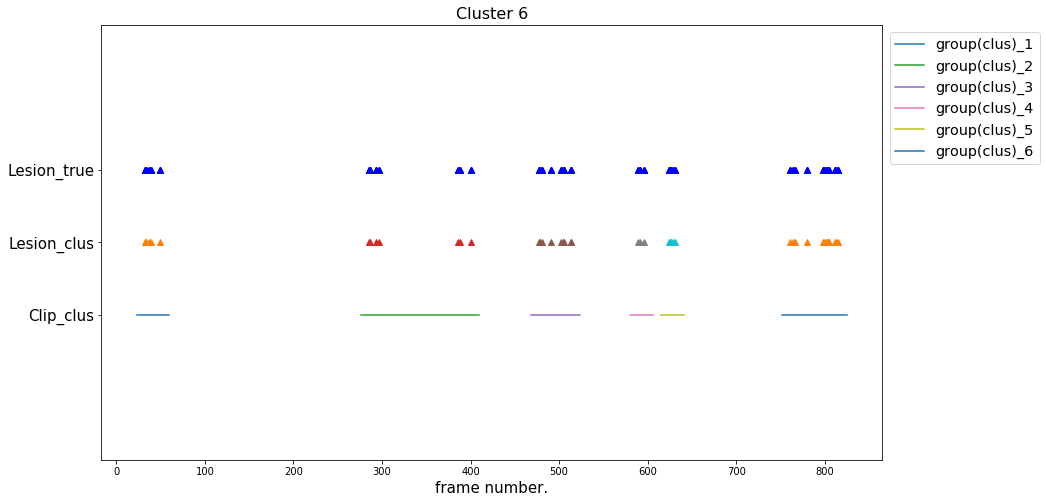

Iteration  4
err  0
k = 7, score = 376



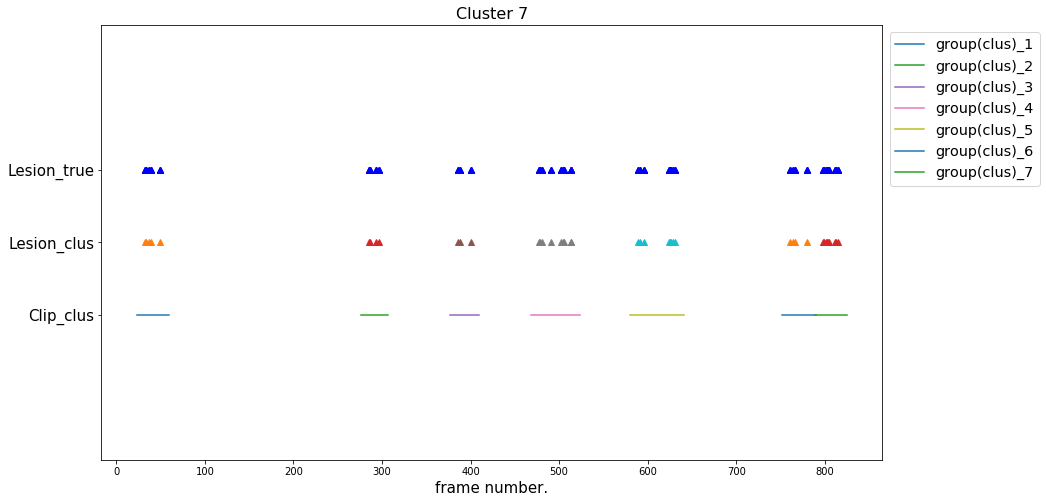

Iteration  4
err  0
k = 8, score = 498



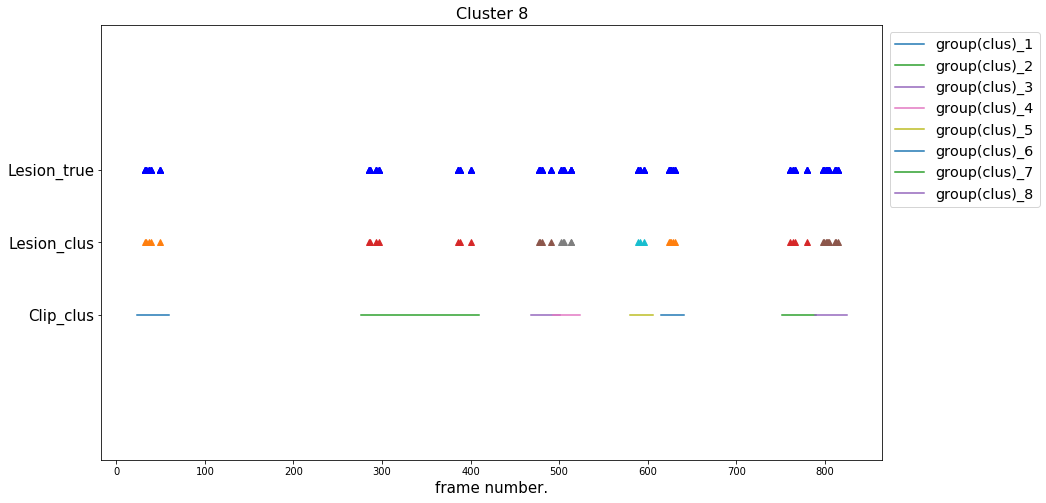

Iteration  3
err  0
k = 9, score = 566



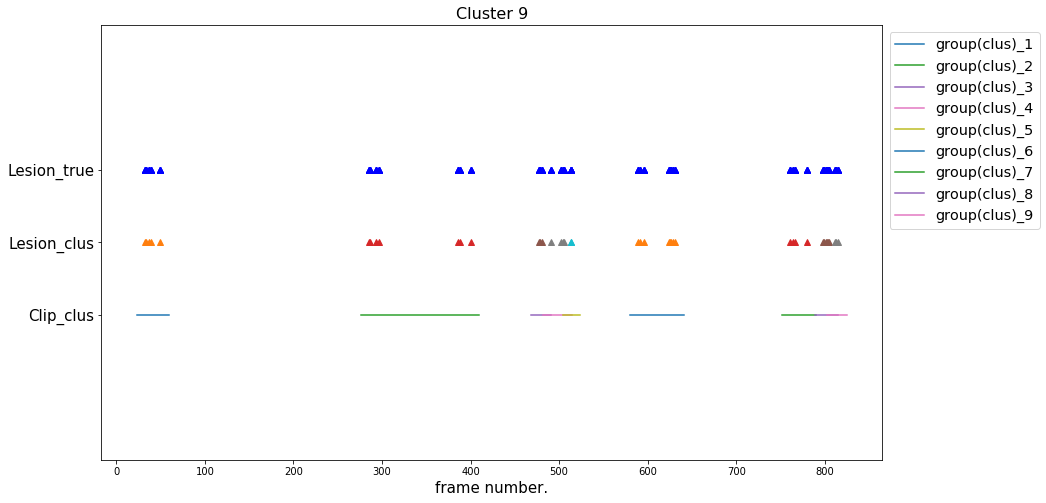

Iteration  4
err  0
k = 10, score = 277



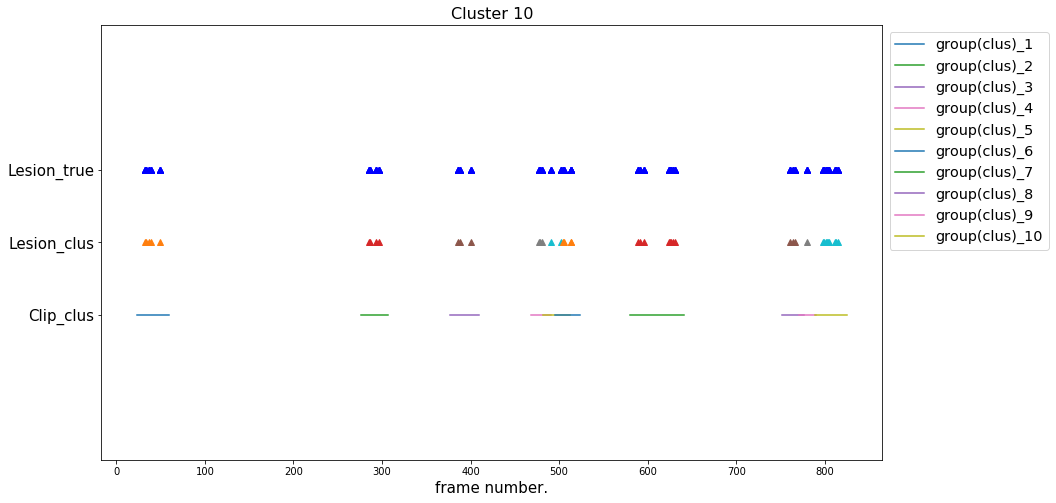

Iteration  3
err  0
k = 11, score = 517



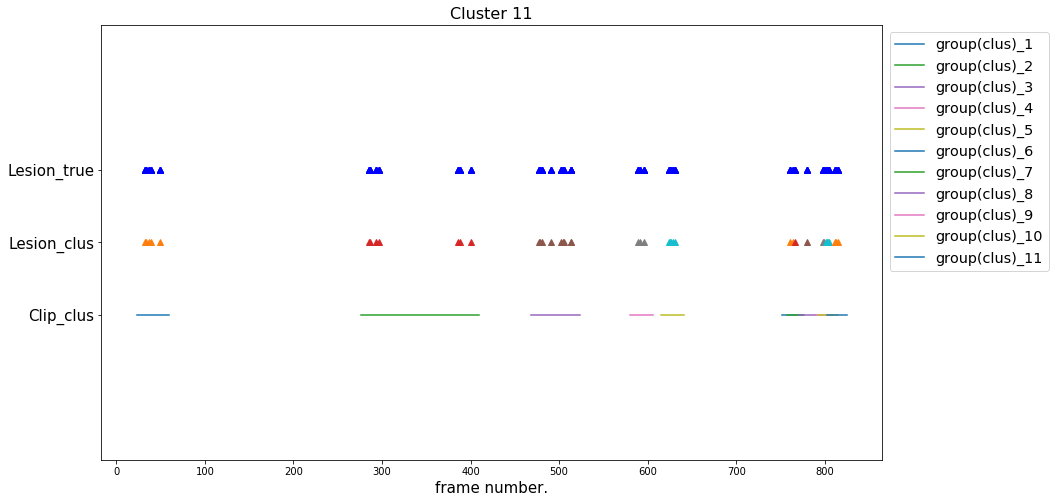

Iteration  5
err  0
k = 12, score = 127



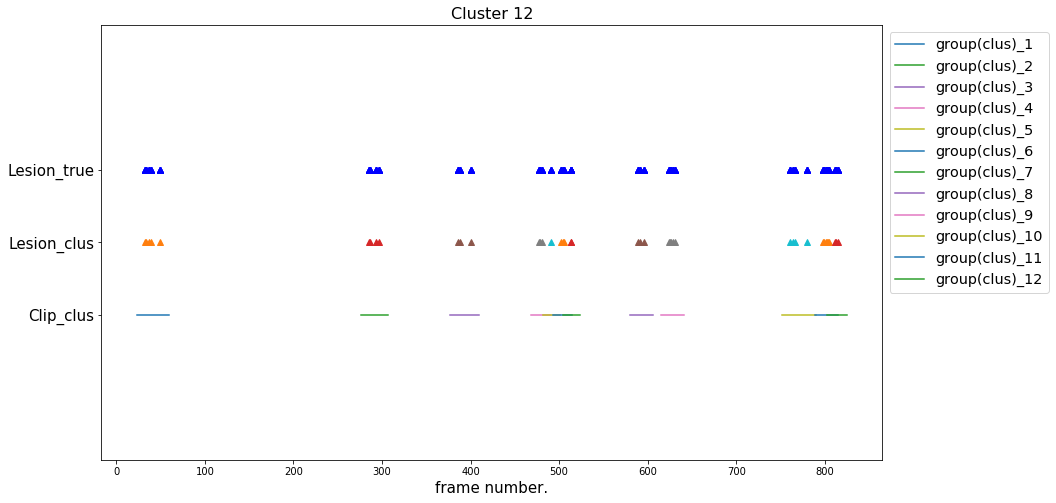

Iteration  3
err  0
k = 13, score = 649



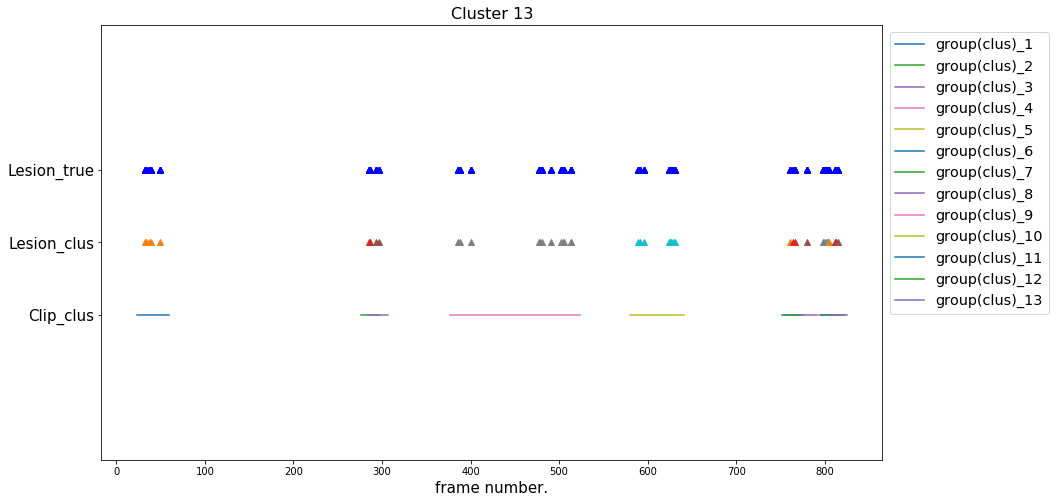

Iteration  3
err  0
k = 14, score = 144



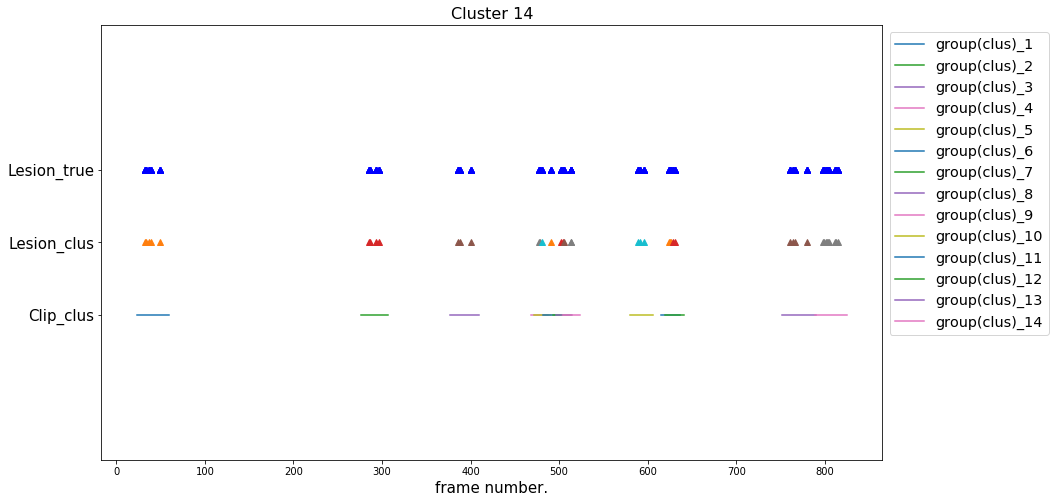

Iteration  3
err  0
k = 15, score = 408



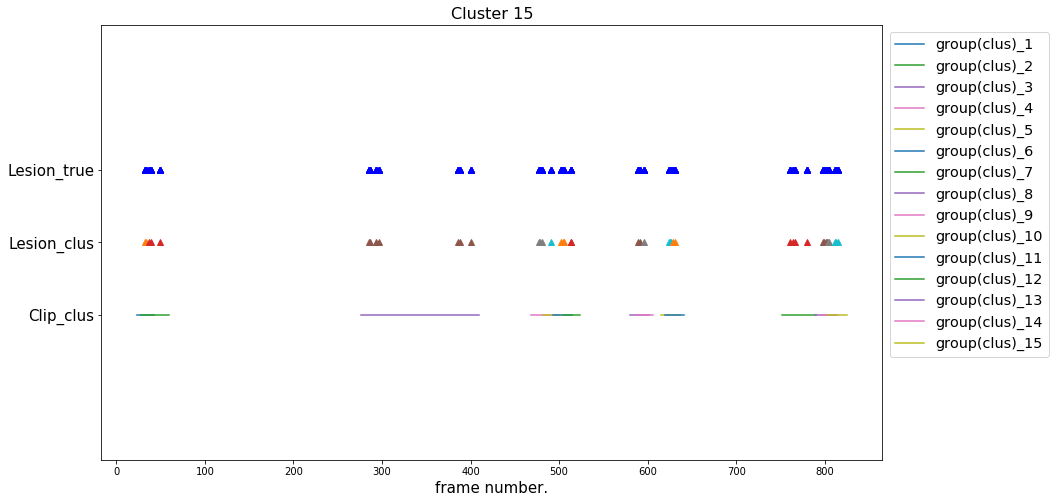

Iteration  3
err  0
k = 16, score = 98



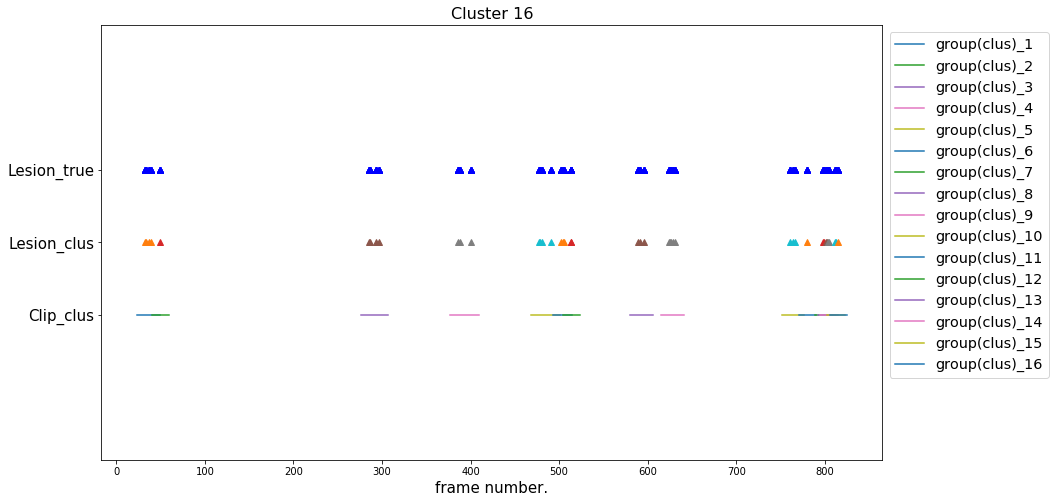

Iteration  3
err  0
k = 17, score = 92



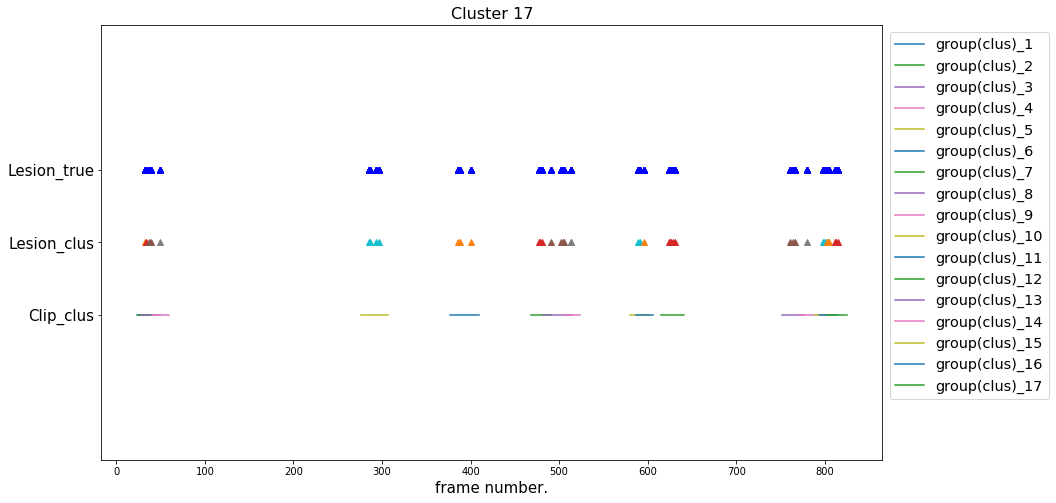

Iteration  3
err  0
k = 18, score = 96



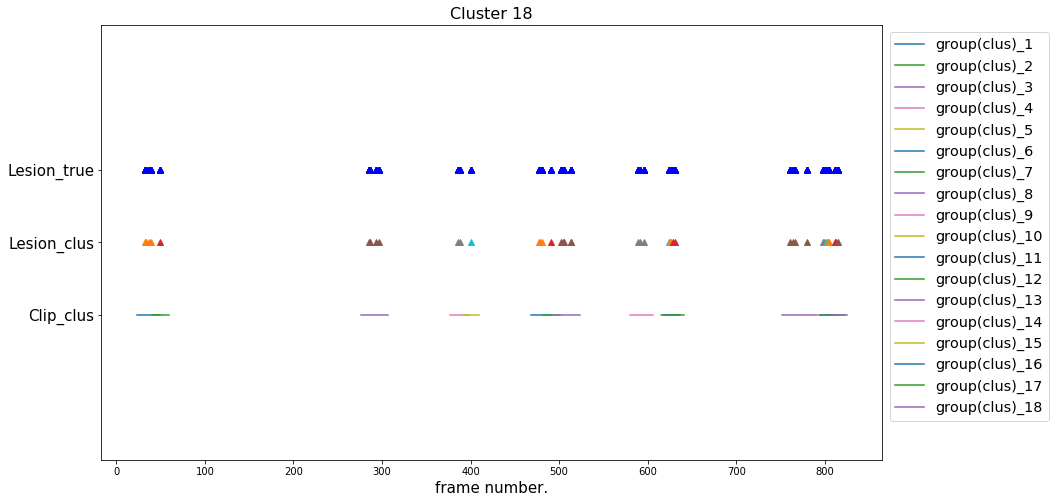

Iteration  4
err  0
k = 19, score = 95



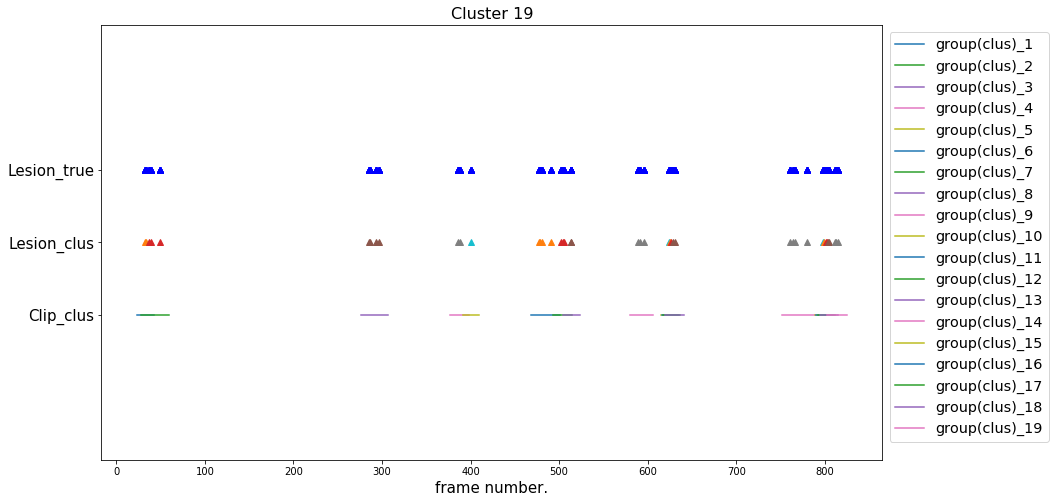

Iteration  3
err  0
k = 20, score = 61



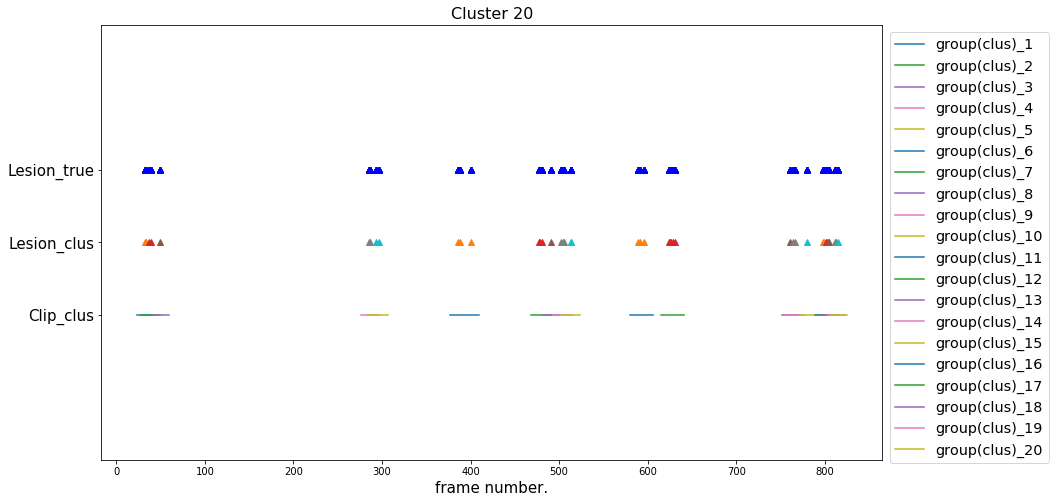

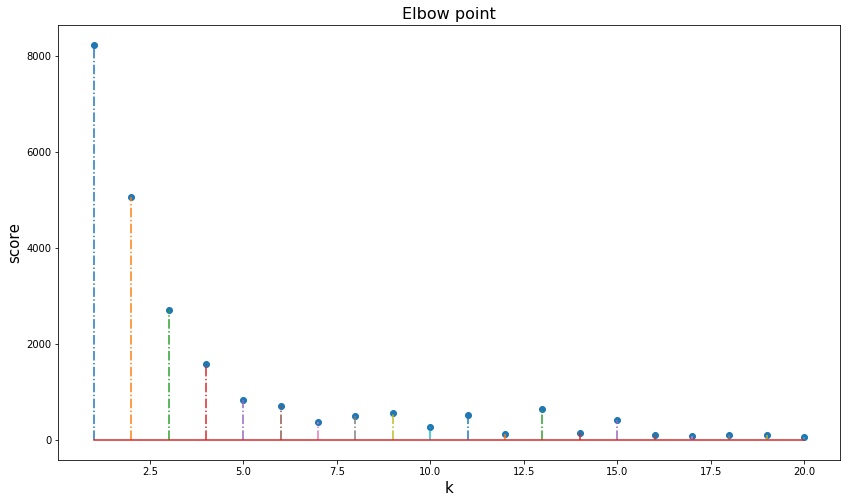

In [144]:
K = [i+1 for i in range(20)] #[1, 2, 3, .., 20]
m = clip_piece.shape[0]  # 42
score_set = []

for k in K:    
    # mu = clip_piece[np.random.randint(0, m, k)]
    mu = clip_piece[np.random.choice(m, k, replace=False)]
    mu.sort()
    #print(mu)
    pre_mu = mu.copy()
    y = np.empty([m, 1])
    
    for n_iter in range(500):
        d = np.empty([m, k])
        
        for i in range(m):
            for j in range(k):
                d[i][j] = np.abs(clip_piece[i] - mu[j])
                y[i] = np.argmin([d[i]])

        err = 0
        #print(y.reshape(1,-1))
        for h in range(k):
            mu[h] = int(np.mean(clip_piece[np.where(y == h)[0]]))
            #print("mu[{}]".format(h), mu[h])
            err += np.abs(pre_mu[h] - mu[h])

        pre_mu = mu.copy()
       

        if err < 1e-10:
            print("Iteration ", n_iter+1)
            print("err ", err)
           
            score_total = 0
            for p in range(k):
                clip_k = clip_piece[np.where(y == p)[0]]
                clip_len = len(clip_k)                  
                for l in range(clip_len):
                    score = np.abs(mu[p] - clip_k[l])
                    score_total += score
            score_set.append(score_total)
            print('k = {}, score = {}\n'.format(p+1, score_total))
          
            break
            
    lesion_clus = []

    for i in range(k):
        lesion_clus.append(clip_piece[np.where(y == i)[0]])

    #print(lesion_clus)
    #print(lesion_clus[0])

    lesion_clus_end = []
    temp = []

    for i in range(k):
        temp = [np.min(lesion_clus[i]) ,np.max(lesion_clus[i])]
        lesion_clus_end.append(temp)

    #print(lesion_clus_end)

    lesion_clus_end = np.sort(lesion_clus_end, axis =0)
    #print(lesion_clus_end)
    
    clip_clus = []
    temp = []
    
    for i in range(k):
        min_clus = lesion_clus_end[i,0] 
        max_clus = lesion_clus_end[i,1]
        temp = np.asarray([min_clus+i-9 for i in range(max_clus-min_clus+20)])
        clip_clus.append(temp)

    clip_clus = np.asarray(clip_clus)

    #print(clip_clus[0])
    #print(clip_clus[0].shape)
    

    plt.figure(figsize=(14, 8))

    for i in range(len(lesion_clus)):
        
        plt.title("Cluster {}".format(k), fontsize=16)
        plt.plot(clip_clus[i], np.zeros(clip_clus[i].shape[0]), label = 'group(clus)_{}'.format(i+1))
        plt.plot(clip_true, 0.1*np.ones(clip_true.shape[0]), '^', color = 'b')
        plt.plot(lesion_clus[i], 0.05*np.ones(lesion_clus[i].shape[0]), '^')
        plt.ylim([-0.1, 0.2])
        plt.xlabel("frame number.", fontsize = 15)
        plt.yticks([0, 0.05, 0.1], ["Clip_clus", "Lesion_clus", "Lesion_true"], fontsize= 15)
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-large')
        #plt.legend()

    plt.show()
            
plt.figure(figsize=(14, 8))
plt.title("Elbow point", fontsize=16)
plt.stem(np.arange(1,len(score_set)+1,1), score_set, '-.')
plt.xlabel("k", fontsize=15)
plt.ylabel("score", fontsize=15)
plt.show()

In [ ]:
k = sort(score_set)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

plt.figure(figsize=(10,6))
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'b.')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'g.')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1],'r.')
plt.show()

Iteration 3
err 0


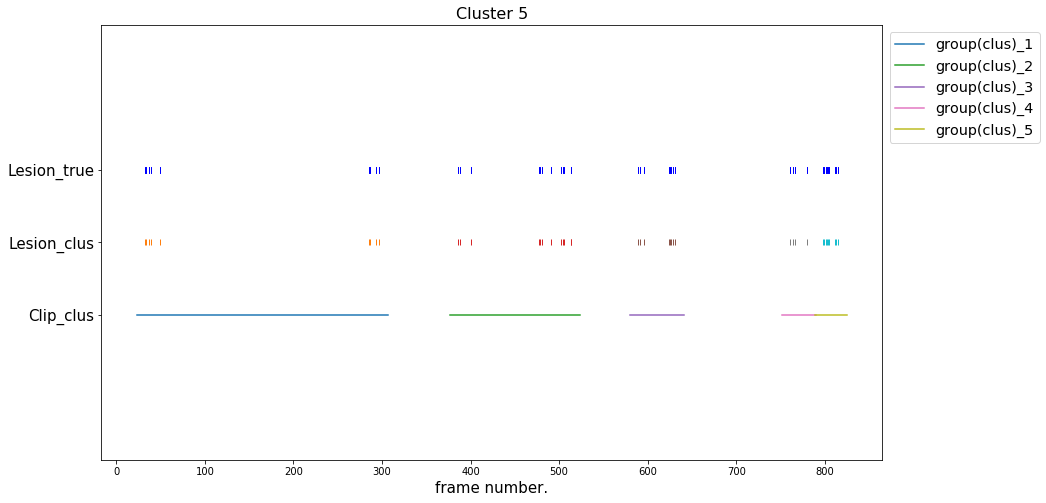

In [154]:
k = 5

mu = clip_piece[np.random.choice(m, k, replace=False)]
mu.sort()

#mu = clip_piece[np.random.randint(0, m, k)]

pre_mu = mu.copy()
y = np.empty([m, 1])

for n_iter in range(500):
    d = np.empty([m, k])

    for i in range(m):
        for j in range(k):
            d[i][j] = np.abs(clip_piece[i] - mu[j])
            y[i] = np.argmin([d[i]])

    err = 0
    for i in range(k):
        mu[i] = np.mean(clip_piece[np.where(y == i)[0]])
        err += np.abs(pre_mu[i] - mu[i])

    pre_mu = mu.copy()

    if err < 1e-10:
        print("Iteration", n_iter)
        print("err", err)
        break

lesion_clus = []

for i in range(k):
    lesion_clus.append(clip_piece[np.where(y == i)[0]])

#print(lesion_clus)
#print(lesion_clus[0])

#plt.figure(figsize=(10, 6))
#for i in range(k):
#   plt.plot(lesion_clus[i], '.', label="cluster {}".format(i+1))

#plt.legend()   
#plt.show()

#print(lesion_clus)
#print(lesion_clus[0])

lesion_clus_end = []
temp = []

for i in range(k):
    temp = [np.min(lesion_clus[i]) ,np.max(lesion_clus[i])]
    lesion_clus_end.append(temp)

#print(lesion_clus_end)

lesion_clus_end = np.sort(lesion_clus_end, axis =0)
#print(lesion_clus_end)
clip_clus = []
temp = []

for i in range(k):
    min_clus = lesion_clus_end[i,0] 
    max_clus = lesion_clus_end[i,1]
    temp = np.asarray([min_clus+i-9 for i in range(max_clus-min_clus+20)])
    clip_clus.append(temp)

clip_clus = np.asarray(clip_clus)
#print(clip_clus[0])
#print(clip_clus[0].shape)

plt.figure(figsize=(14, 8))

for i in range(len(lesion_clus)):

    plt.title("Cluster {}".format(k), fontsize=16)
    plt.plot(clip_clus[i], np.zeros(clip_clus[i].shape[0]), label = 'group(clus)_{}'.format(i+1))
    plt.plot(clip_true, 0.1*np.ones(clip_true.shape[0]), '|', color = 'b')
    plt.plot(lesion_clus[i], 0.05*np.ones(lesion_clus[i].shape[0]), '|')
    plt.ylim([-0.1, 0.2])
    plt.xlabel("frame number.", fontsize = 15)
    plt.yticks([0, 0.05, 0.1], ["Clip_clus", "Lesion_clus", "Lesion_true"], fontsize= 15)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-large')
    #plt.legend()

plt.show()

In [81]:
y = np.empty([m,1])

for n_iter in range(500):
    for i in range(m):
        d0 = np.abs(clip_piece[i] - mu[0])
        d1 = np.abs(clip_piece[i] - mu[1])
        d2 = np.abs(clip_piece[i] - mu[2])
        d3 = np.abs(clip_piece[i] - mu[3])
        d4 = np.abs(clip_piece[i] - mu[4])
        y[i] = np.argmin([d0, d1, d2, d3, d4])
    
    err = 0
    for i in range(k):
        mu[i] = np.mean(clip_piece[np.where(y == i)[0]])
        err += np.abs(pre_mu[i] - mu[i])

    pre_mu = mu.copy()

    if err < 1e-10:
        print("Iteration", n_iter)
        print("err", err)
        break

Iteration 2
err 0


[array([812, 813, 815]), array([386, 388, 400, 477, 478, 481, 491, 502, 504, 505, 513, 514, 589,
       591, 596, 624, 625, 626, 629, 631]), array([798, 799, 801, 802, 804, 805]), array([761, 764, 766, 780]), array([ 32,  33,  37,  39,  49, 285, 287, 293, 297])]
[812 813 815]


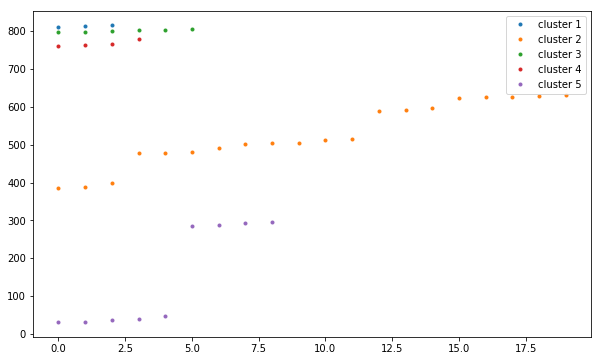

In [82]:
lesion_clus = []

for i in range(k):
    lesion_clus.append(clip_piece[np.where(y == i)[0]])
    
print(lesion_clus)
print(lesion_clus[0])

plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(lesion_clus[i], '.', label="cluster {}".format(i+1))
    
plt.legend()   
plt.show()

In [83]:
lesion_clus = np.asarray(lesion_clus)

print(lesion_clus)

[array([812, 813, 815])
 array([386, 388, 400, 477, 478, 481, 491, 502, 504, 505, 513, 514, 589,
       591, 596, 624, 625, 626, 629, 631])
 array([798, 799, 801, 802, 804, 805]) array([761, 764, 766, 780])
 array([ 32,  33,  37,  39,  49, 285, 287, 293, 297])]


In [84]:
lesion_clus_end = []
temp = []

for i in range(k):
    temp = [np.min(lesion_clus[i]) ,np.max(lesion_clus[i])]
    lesion_clus_end.append(temp)
    
print(lesion_clus_end)

lesion_clus_end = np.sort(lesion_clus_end, axis =0)
print(lesion_clus_end)

[[812, 815], [386, 631], [798, 805], [761, 780], [32, 297]]
[[ 32 297]
 [386 631]
 [761 780]
 [798 805]
 [812 815]]


In [38]:
print(lesion_clus_end[0,1]-lesion_clus_end[0,0])

327


In [85]:
clip_clus = []
temp = []

for i in range(k):
    min_clus = lesion_clus_end[i,0] 
    max_clus = lesion_clus_end[i,1]
    temp = np.asarray([min_clus+i-9 for i in range(max_clus-min_clus+20)])
    clip_clus.append(temp)

clip_clus = np.asarray(clip_clus)

print(clip_clus[0])
print(clip_clus[0].shape)

[ 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 26

In [86]:
print(clip_true.shape)
print(clip_true)

(42,)
[ 32  33  37  39  49 285 287 293 297 386 388 400 477 478 481 491 502 504
 505 513 514 589 591 596 624 625 626 629 631 761 764 766 780 798 799 801
 802 804 805 812 813 815]


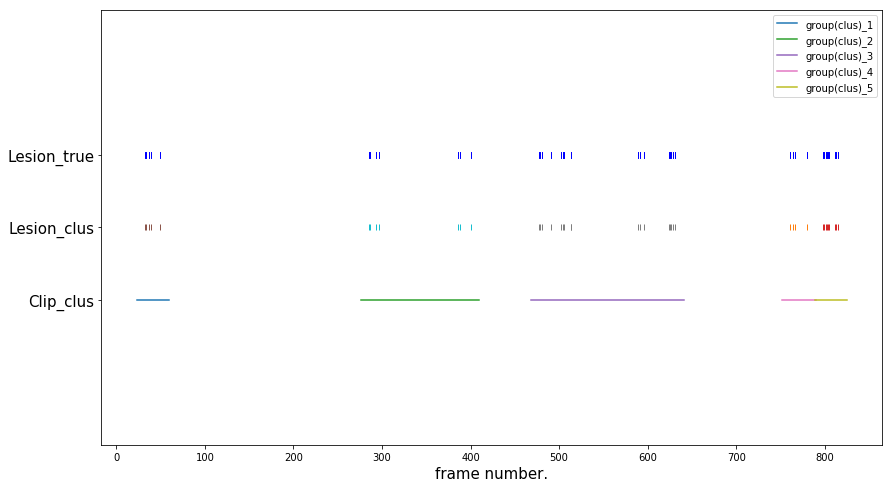

In [148]:
plt.figure(figsize=(14, 8))

for i in range(len(lesion_clus)):
    
    plt.plot(clip_clus[i], np.zeros(clip_clus[i].shape[0]), label = 'group(clus)_{}'.format(i+1))
    plt.plot(clip_true, 0.1*np.ones(clip_true.shape[0]), '|', color = 'b')
    plt.plot(lesion_clus[i], 0.05*np.ones(lesion_clus[i].shape[0]), '|')
    plt.ylim([-0.1, 0.2])
    plt.xlabel("frame number.", fontsize = 15)
    plt.yticks([0, 0.05, 0.1], ["Clip_clus", "Lesion_clus", "Lesion_true"], fontsize= 15)
    plt.legend()
             
plt.show()

# of lesions within group(clus)_1 =  3
# of lesions within group(clus)_2 =  20
# of lesions within group(clus)_3 =  6
# of lesions within group(clus)_4 =  4
# of lesions within group(clus)_5 =  9


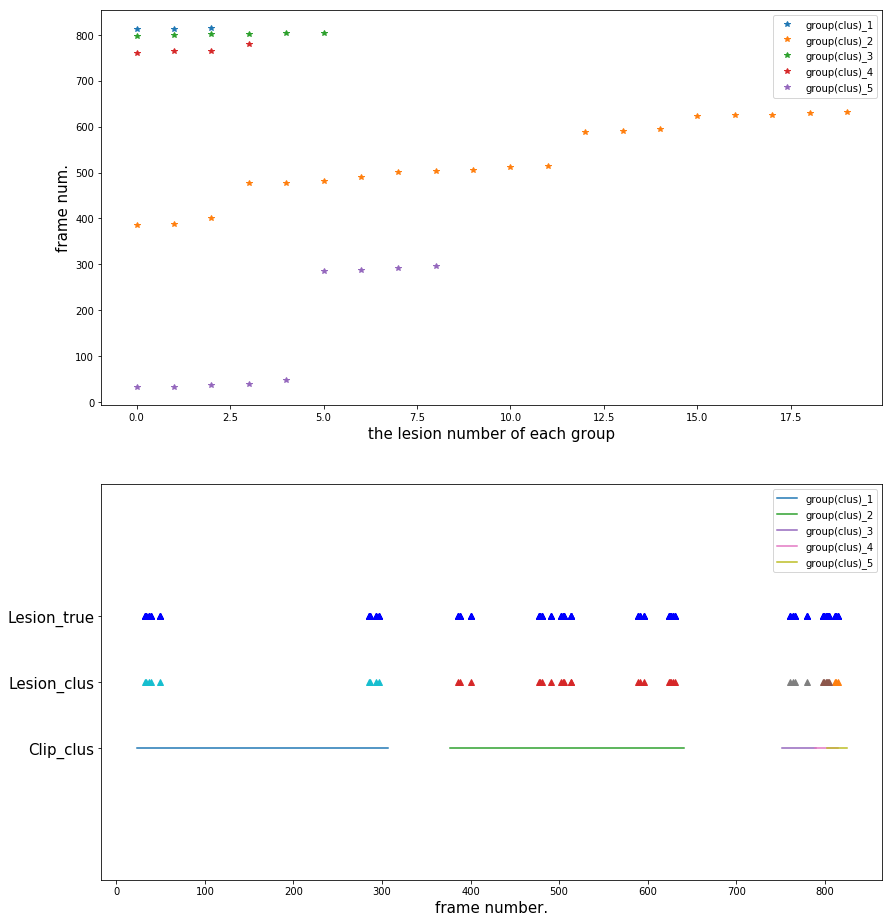

In [99]:
plt.figure(figsize=(14, 16))

for i in range(len(lesion_clus)):
    #plt.plot(clip_100[i], label="clip{}".format(i+1))
    plt.subplot(2, 1, 1)
    plt.plot(lesion_clus[i], '*',  label = 'group(clus)_{}'.format(i+1))
    plt.xlabel("the lesion number of each group", fontsize = 15)
    plt.ylabel("frame num.", fontsize = 15)
    plt.legend()

    plt.subplot(2, 1, 2)   
    plt.plot(clip_clus[i], np.zeros(clip_clus[i].shape[0]), label = 'group(clus)_{}'.format(i+1))
    plt.plot(clip_true, 0.1*np.ones(clip_true.shape[0]), '^', color = 'b')
    plt.plot(lesion_clus[i], 0.05*np.ones(lesion_clus[i].shape[0]), '^')
    plt.ylim([-0.1, 0.2])
    plt.xlabel("frame number.", fontsize = 15)
    plt.yticks([0, 0.05, 0.1], ["Clip_clus", "Lesion_clus", "Lesion_true"], fontsize= 15)
    plt.legend()
    
    print("# of lesions within group(clus)_{} = ".format(i+1), len(lesion_clus[i]))
    
plt.show()

### 2. # of lesions

In [268]:
print(clip_piece)

print(len(clip_piece)//10, "," , len(clip_piece)%10 )

[ 89 211 215 220 223 305 307 310 314 321 322 323 324 333 524 527 528 529
 532 538 694 696 698 704 713 741 744 745 748 755 841 843 845 847 907 908
 910 912 914 916 918 919 927 957 960 968 970]
4 , 7


In [279]:
n = 0
temp = []
lesion_num = []

for i in clip_piece:
    n += 1
    temp.append(i)
    if n == 10:
        temp = np.asarray(temp)
        lesion_num.append(temp)
        temp = []
        n = 0

temp = np.asarray(temp)
lesion_num.append(temp)
        

print(lesion_num)

lesion_num = np.asarray(lesion_num)

print(lesion_num)

[array([ 89, 211, 215, 220, 223, 305, 307, 310, 314, 321]), array([322, 323, 324, 333, 524, 527, 528, 529, 532, 538]), array([694, 696, 698, 704, 713, 741, 744, 745, 748, 755]), array([841, 843, 845, 847, 907, 908, 910, 912, 914, 916]), array([918, 919, 927, 957, 960, 968, 970])]
[array([ 89, 211, 215, 220, 223, 305, 307, 310, 314, 321])
 array([322, 323, 324, 333, 524, 527, 528, 529, 532, 538])
 array([694, 696, 698, 704, 713, 741, 744, 745, 748, 755])
 array([841, 843, 845, 847, 907, 908, 910, 912, 914, 916])
 array([918, 919, 927, 957, 960, 968, 970])]


In [280]:
lesion_num_end = []
temp = []

for i in range(k):
    temp = [np.min(lesion_num[i]) ,np.max(lesion_num[i])]
    lesion_num_end.append(temp)
    
print(lesion_num_end)

lesion_num_end = np.sort(lesion_num_end, axis =0)
print(lesion_num_end)

[[89, 321], [322, 538], [694, 755], [841, 916], [918, 970]]
[[ 89 321]
 [322 538]
 [694 755]
 [841 916]
 [918 970]]


In [281]:
clip_num = []
temp = []

for i in range(k):
    min_num = lesion_num_end[i,0] 
    max_num = lesion_num_end[i,1]
    temp = np.asarray([min_num+i-9 for i in range(max_num-min_num+20)])
    clip_num.append(temp)

clip_num = np.asarray(clip_num)

print(clip_num[0])
print(clip_num[0].shape)

[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 32

# of lesions within group(num)_1 =  10
# of lesions within group(num)_2 =  10
# of lesions within group(num)_3 =  10
# of lesions within group(num)_4 =  10
# of lesions within group(num)_5 =  7


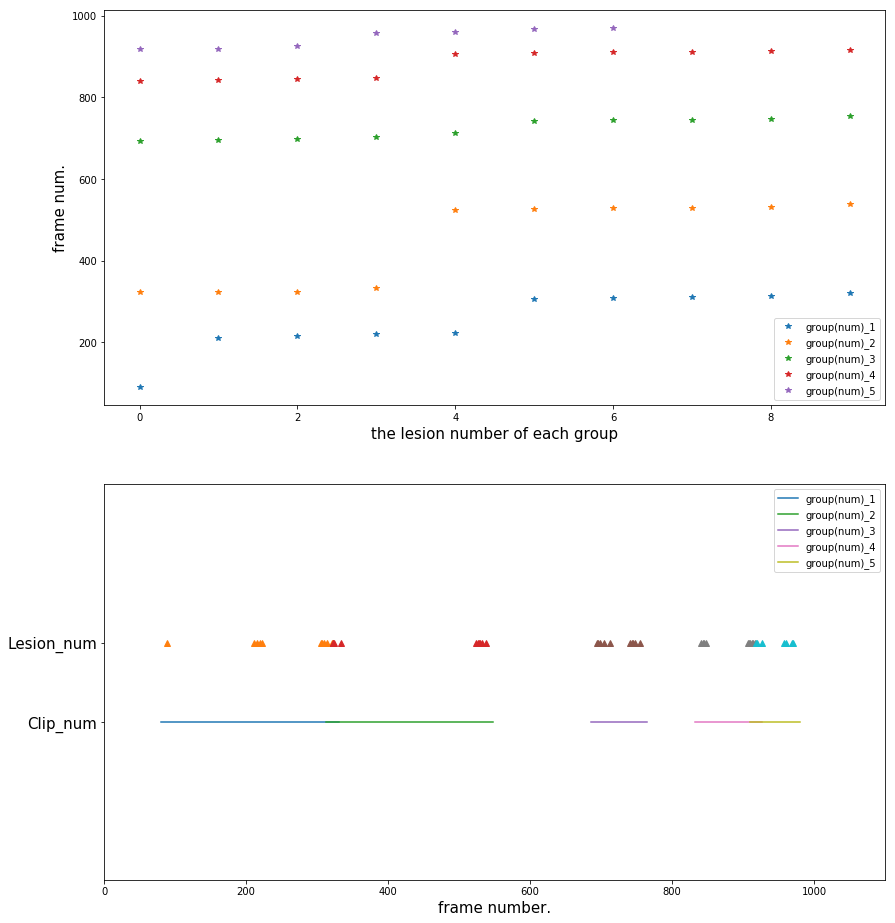

In [307]:
plt.figure(figsize=(14, 16))

for i in range(len(lesion_num)):
    #plt.plot(clip_100[i], label="clip{}".format(i+1))
    plt.subplot(2, 1, 1)
    plt.plot(lesion_num[i], '*',  label = 'group(num)_{}'.format(i+1))
    plt.xlabel("the lesion number of each group", fontsize = 15)
    plt.ylabel("frame num.", fontsize = 15)
    plt.legend()

    
    plt.subplot(2, 1, 2) 
    plt.plot(clip_num[i], np.zeros(clip_num[i].shape[0]), label = 'group(num)_{}'.format(i+1))
    plt.plot(lesion_num[i], 0.05*np.ones(lesion_num[i].shape[0]), '^')
    plt.axis([0, 1100, -0.1, 0.15])
    plt.xlabel("frame number.", fontsize = 15)
    plt.yticks([0, 0.05], ["Clip_num", "Lesion_num"], fontsize= 15)
    plt.legend()
    
    print("# of lesions within group(num)_{} = ".format(i+1), len(lesion_num[i]))
    
plt.show()

### 3. fixed clip length from the lesion which is discovered first

In [80]:
print(clip_piece)

[ 89 211 215 220 223 305 307 310 314 321 322 323 324 333 524 527 528 529
 532 538 694 696 698 704 713 741 744 745 748 755 841 843 845 847 907 908
 910 912 914 916 918 919 927 957 960 968 970]


In [305]:
length = 100
clip_piece_copy = clip_piece
print(clip_piece_copy)

lesion_length = []
clip_length = []
for i in range(logits_v.shape[0]):
    if i in clip_piece_copy:
        point = i
        clip_temp_length = np.asarray([point-10 + k for k in range(length)])
        clip_length.append(clip_temp_length)
        
        dead_clip = np.where(clip_piece_copy <= max(clip_temp_length)) 
        next_clip = np.where(clip_piece_copy > max(clip_temp_length))
        lesion_point = clip_piece_copy[dead_clip]   
        lesion_length.append(lesion_point)

        clip_piece_copy = clip_piece_copy[next_clip]

print(type(clip_length[0]))

[ 89 211 215 220 223 305 307 310 314 321 322 323 324 333 524 527 528 529
 532 538 694 696 698 704 713 741 744 745 748 755 841 843 845 847 907 908
 910 912 914 916 918 919 927 957 960 968 970]
<class 'numpy.ndarray'>


In [244]:
print(clip_100[0].shape[0])

100


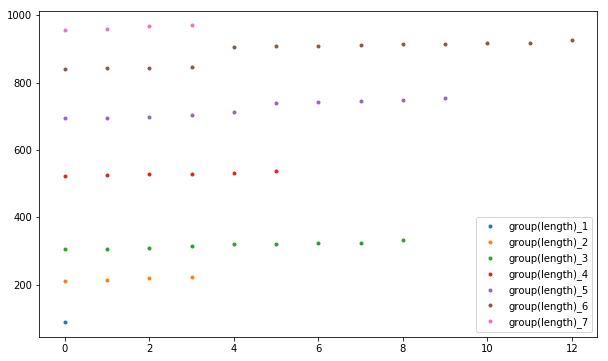

In [296]:
plt.figure(figsize=(10, 6))

for i in range(len(lesion_length)):
    plt.plot(lesion_length[i],'.', label="group(length)_{}".format(i+1))
    
plt.legend()
plt.show()

# of lesions within group(length)_1 =  1
# of lesions within group(length)_2 =  4
# of lesions within group(length)_3 =  9
# of lesions within group(length)_4 =  6
# of lesions within group(length)_5 =  10
# of lesions within group(length)_6 =  13
# of lesions within group(length)_7 =  4


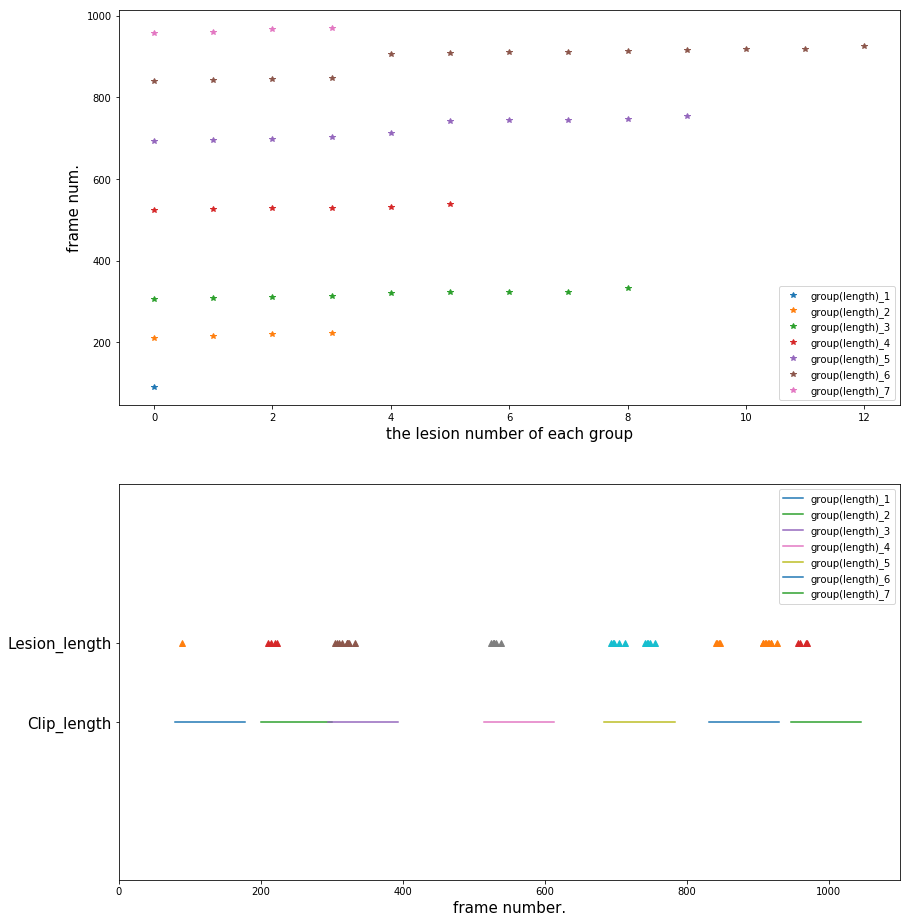

In [306]:
plt.figure(figsize=(14, 16))

for i in range(len(lesion_length)):
    #plt.plot(clip_100[i], label="clip{}".format(i+1))
    plt.subplot(2, 1, 1)
    plt.plot(lesion_length[i], '*',  label = 'group(length)_{}'.format(i+1))
    plt.xlabel("the lesion number of each group", fontsize = 15)
    plt.ylabel("frame num.", fontsize = 15)
    plt.legend()

    
    plt.subplot(2, 1, 2) 
    plt.plot(clip_length[i], np.zeros(clip_length[i].shape[0]), label = 'group(length)_{}'.format(i+1))
    plt.plot(lesion_length[i], 0.05*np.ones(lesion_length[i].shape[0]), '^')
    plt.axis([0, 1100, -0.1, 0.15])
    plt.xlabel("frame number.", fontsize = 15)
    plt.yticks([0, 0.05], ["Clip_length", "Lesion_length"], fontsize= 15)
    plt.legend()
    
    print("# of lesions within group(length)_{} = ".format(i+1), len(lesion_length[i]))
    
plt.show()

# of lesions with clip1 =  1
# of lesions with clip2 =  4
# of lesions with clip3 =  9
# of lesions with clip4 =  6
# of lesions with clip5 =  10
# of lesions with clip6 =  13
# of lesions with clip7 =  4


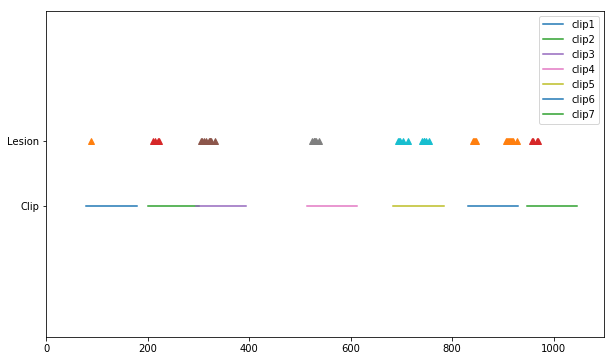

In [187]:
plt.figure(figsize=(10, 6))
clip_100 = np.asarray(clip_100)

for i in range(len(clip_points)):
    #plt.plot(clip_100[i], label="clip{}".format(i+1))
    plt.plot(clip_100[i], np.zeros(clip_100[i].shape[0]), label = 'clip{}'.format(i+1))
    plt.plot(clip_points[i], 0.05*np.ones(clip_points[i].shape[0]), '^')
    plt.axis([0, 1100, -0.1, 0.15])
    plt.yticks([0, 0.05], ["Clip", "Lesion"])
    print("# of lesions with clip{} = ".format(i+1), len(clip_points[i]))
    
plt.legend()
plt.show()

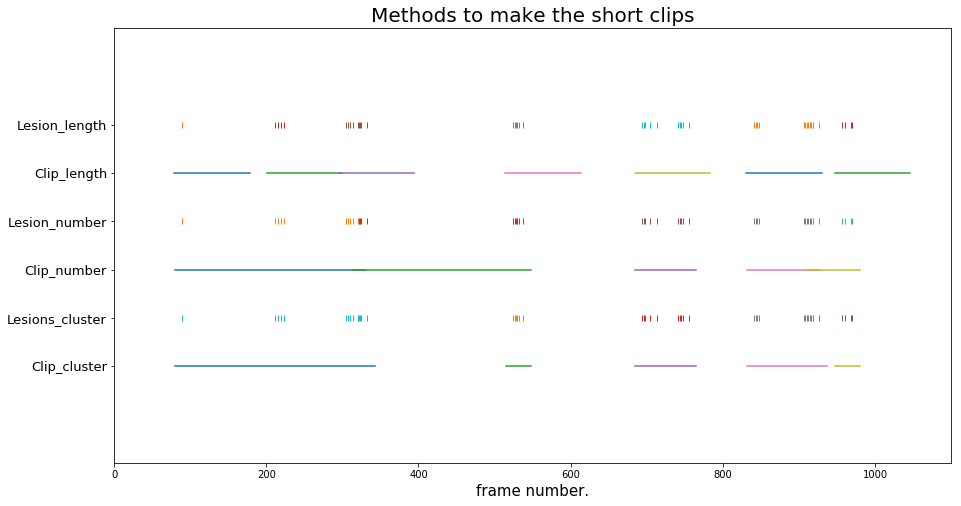

In [328]:
plt.figure(figsize=(15, 8))
plt.title("Methods to make the short clips", fontsize = 20)
for i in range(len(lesion_clus)):
    plt.plot(clip_clus[i], np.zeros(clip_clus[i].shape[0]), label = 'group(clus)_{}'.format(i+1))
    plt.plot(lesion_clus[i], 0.05*np.ones(lesion_clus[i].shape[0]), '|')
for i in range(len(lesion_num)):
    plt.plot(clip_num[i], 0.1*np.ones(clip_num[i].shape[0]), label = 'group(num)_{}'.format(i+1))
    plt.plot(lesion_num[i], 0.15*np.ones(lesion_num[i].shape[0]), '|')
for i in range(len(lesion_length)):
    plt.plot(clip_length[i], 0.2*np.ones(clip_length[i].shape[0]), label = 'group(length)_{}'.format(i+1))
    plt.plot(lesion_length[i], 0.25*np.ones(lesion_length[i].shape[0]), '|')

plt.axis([0, 1100, -0.1, 0.35])
plt.xlabel("frame number.", fontsize = 15)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], ["Clip_cluster", "Lesions_cluster", "Clip_number", "Lesion_number",
                                             "Clip_length", "Lesion_length"], fontsize= 13)

plt.show()


## Clip Interval

In [21]:
clip1_interval = [np.min(clip1), np.max(clip1)]
clip2_interval = [np.min(clip2), np.max(clip2)]
clip3_interval = [np.min(clip3), np.max(clip3)]
clip4_interval = [np.min(clip4), np.max(clip4)]
clip5_interval = [np.min(clip5), np.max(clip5)]

print(clip1_interval)
print(clip2_interval)
print(clip3_interval)
print(clip4_interval)
print(clip5_interval)

clip_interval = np.vstack([clip1_interval, clip2_interval, clip3_interval, clip4_interval, clip5_interval])
clip_interval = np.sort(clip_interval, axis = 0)
print("\n", clip_interval)

# rough하게 

clip1_interval = [np.min(clip1)-9+i for i in range(np.max(clip1)-np.min(clip1)+20)]
clip2_interval = [np.min(clip2)-9+i for i in range(np.max(clip2)-np.min(clip2)+20)]
clip3_interval = [np.min(clip3)-9+i for i in range(np.max(clip3)-np.min(clip3)+20)]
clip4_interval = [np.min(clip4)-9+i for i in range(np.max(clip4)-np.min(clip4)+20)]
clip5_interval = [np.min(clip5)-9+i for i in range(np.max(clip5)-np.min(clip5)+20)]

[741, 755]
[524, 538]
[694, 713]
[5, 333]
[837, 970]

 [[  5 333]
 [524 538]
 [694 713]
 [741 755]
 [837 970]]


## Making the Video Clips

In [156]:
clip_clus[0][0]

23

In [162]:
print("{0:04d}".format(clip_clus[0][2]))

0025


In [171]:
print(len(clip_clus[0]))
print(clip_clus[3])

285
[752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769
 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787
 788 789 790]


In [193]:
print(clip_clus[1][3])

380


In [203]:
import glob
k = 5
for i in range(k):
    img_array = []
    for j in range(len(clip_clus[i])):
        for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip_clus[i][j])):
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
            img_array.append(img)

        out = cv2.VideoWriter('./files/clip/clip{}.avi'.format(i+1) , cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
        for u in range(len(img_array)):
            out.write(img_array[u])        
        out.release()        

In [205]:
import glob
k = 5
img_array = []
for i in range(k):
    for j in range(len(clip_clus[i])):
        for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip_clus[i][j])):
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
            img_array.append(img)

out = cv2.VideoWriter('./files/clip/clip.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
for u in range(len(img_array)):
    out.write(img_array[u])        
out.release()        

In [22]:
import glob

img_array = []
for i in range(len(clip1_interval)):
    for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip1_interval[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter('./files/clip/clip1.avi' , cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
    for i in range(len(img_array)):
        out.write(img_array[i])        
    out.release()

img_array = []
for i in range(len(clip2_interval)):
    for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip2_interval[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter('./files/clip/clip2.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
    for i in range(len(img_array)):
        out.write(img_array[i])        
    out.release()

img_array = []
for i in range(len(clip3_interval)):
    for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip3_interval[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter('./files/clip/clip3.avi' , cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
    for i in range(len(img_array)):
        out.write(img_array[i])        
    out.release()

img_array = []
for i in range(len(clip4_interval)):
    for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip4_interval[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter('./files/clip/clip4.avi' , cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
    for i in range(len(img_array)):
        out.write(img_array[i])        
    out.release()

img_array = []
for i in range(len(clip5_interval)):
    for filename in glob.glob('./files/frame_clip/frame_{0:04d}.jpg'.format(clip5_interval[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter('./files/clip/clip5.avi' , cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
    for i in range(len(img_array)):
        out.write(img_array[i])        
    out.release()